### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [245]:
data = pd.read_csv('data/coupons.csv')

In [131]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [133]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [10]:
# For each column check the unique values and count
for column in data.columns:
        print(data[column].value_counts())  
        print("\n")

destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64


passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64


weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64


temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64


time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64


coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64


expiration
1d    7091
2h    5593
Name: count, dtype: int64


gender
Female    6511
Male      6173
Name: count, dtype: int64


age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64


maritalStatus
Married partner      5100
Single         

In [241]:
#check the datatypes for each column
print(data.dtypes)

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object


3. Decide what to do about your missing data -- drop, replace, other...

In [247]:
# Drop Car column
# Replace all NaN with the max distict value of the respective column 

#Drop column Cars 
data.drop(columns=['car'], inplace=True)

# Replace NaN with Mode for Bar
most_common_value = data['Bar'].mode().iloc[0]
data['Bar'].fillna(most_common_value, inplace=True)


# Replace NaN with Mode for CoffeeHouse
most_common_value = data['CoffeeHouse'].mode().iloc[0]
data['CoffeeHouse'].fillna(most_common_value, inplace=True)

# Replace NaN with Mode for CarryAway
most_common_value = data['CarryAway'].mode().iloc[0]
data['CarryAway'].fillna(most_common_value, inplace=True)

# Replace NaN with Mode for RestaurantLessThan20
most_common_value = data['RestaurantLessThan20'].mode().iloc[0]
data['RestaurantLessThan20'].fillna(most_common_value, inplace=True)

# Replace NaN with Mode for Restaurant20To50
most_common_value = data['Restaurant20To50'].mode().iloc[0]
data['Restaurant20To50'].fillna(most_common_value, inplace=True)

#Age is object and we see only two values as a sting 50plus and below21
data['age'] = data['age'].replace({'50plus': 50, 'below21': 20})
data['age'] = data['age'].astype(str)
data.isna().sum()


C:\Users\EnqueroGenpact User\AppData\Local\Temp\ipykernel_11156\3015877757.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Bar'].fillna(most_common_value, inplace=True)
C:\Users\EnqueroGenpact User\AppData\Local\Temp\ipykernel_11156\3015877757.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [249]:
# Calculate the proportion of rows where Y is 1
total_rows = data.shape[0]
accepted_coupons = data['Y'].sum()
proportion_accepted = accepted_coupons / total_rows

print(f"Proportion of the total that chose to accept the coupon: {proportion_accepted:.2f}")

Proportion of the total that chose to accept the coupon: 0.57


5. Use a bar plot to visualize the `coupon` column.

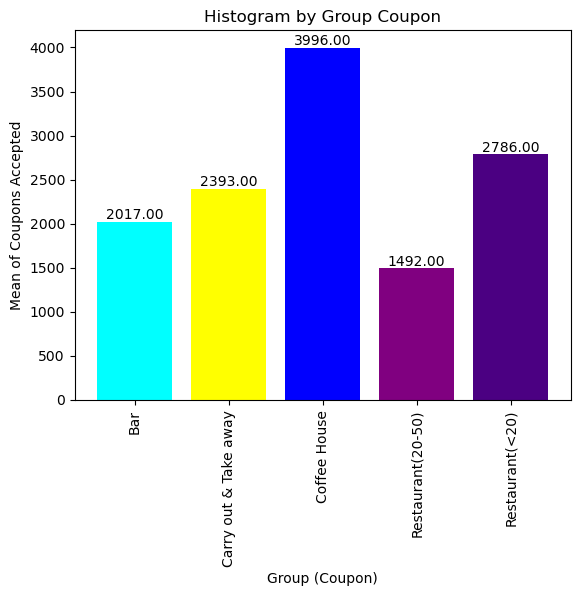

In [251]:
grouped_data = data.groupby('coupon')['coupon'].count()
bar_colors = ['cyan', 'yellow', 'blue','purple','indigo']  # Add more colors if needed
# Plot the histogram
plt.bar(grouped_data.index, grouped_data.values,color=bar_colors)
plt.xticks(rotation=90)
plt.xlabel('Group (Coupon)')
plt.ylabel('Mean of Coupons Accepted')
plt.title('Histogram by Group Coupon')

#To add count of accpeted coupons 
for x, y in zip(grouped_data.index, grouped_data.values):
    plt.text(x, y, f"{y:.2f}", ha='center', va='bottom')


plt.show()

Y                         0     1
coupon                           
Bar                    1190   827
Carry out & Take away   633  1760
Coffee House           2001  1995
Restaurant(20-50)       834   658
Restaurant(<20)         816  1970


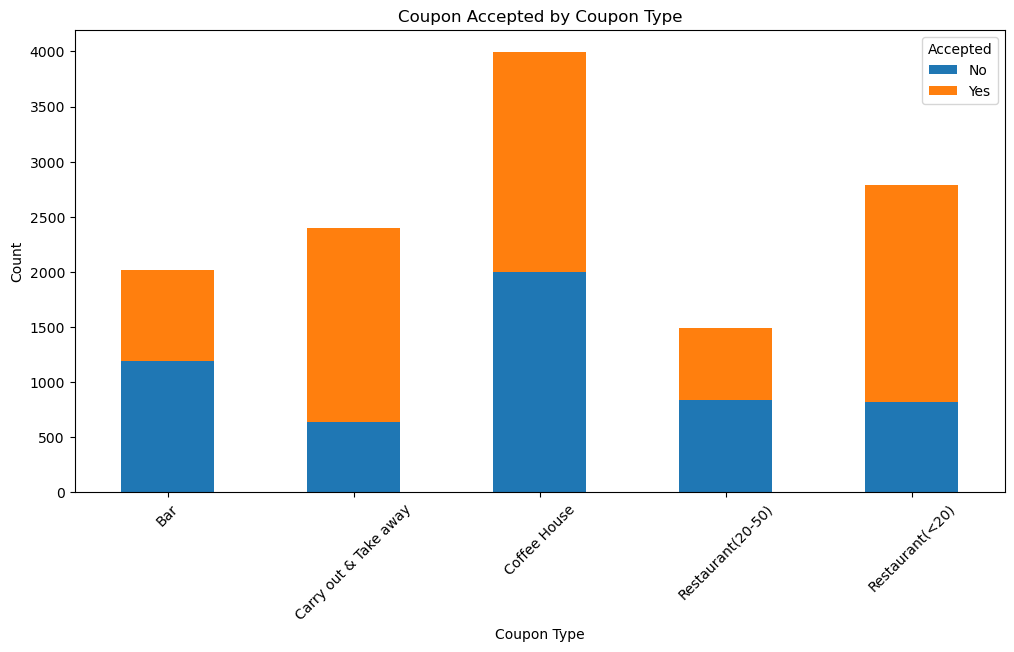

In [253]:
# Calculate the count of each category in the 'coupon' column, grouped by the 'Y' column
coupon_accepted = data.groupby(['coupon', 'Y']).size().unstack()
print(coupon_accepted)
# Plot the stacked bar plot
coupon_accepted.plot(kind='bar', stacked=True,  figsize=(12, 6))
plt.title('Coupon Accepted by Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Accepted', labels=['No', 'Yes'])
plt.show()


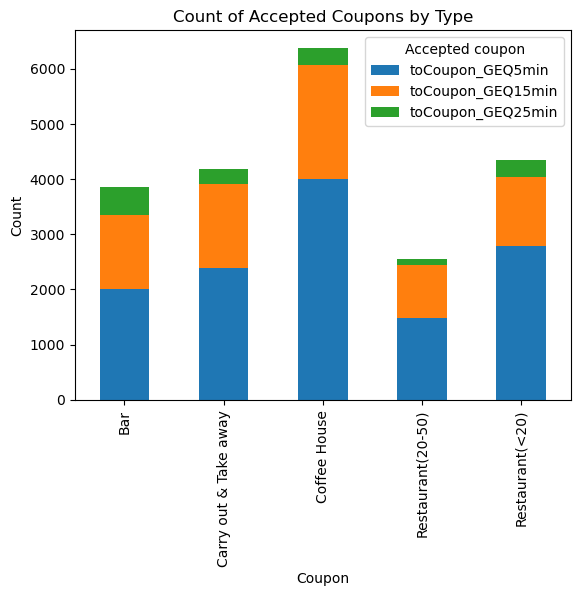

In [255]:
grouped_data = data.groupby('coupon')[['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']].sum()

# Plot the grouped bar chart
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.title('Count of Accepted Coupons by Type')
plt.legend(title='Accepted coupon', loc='upper right')
plt.show()

6. Use a histogram to visualize the temperature column.

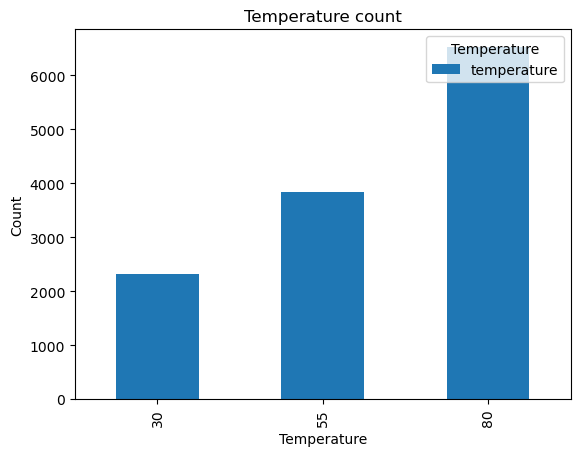

In [257]:
data['temperature'].value_counts()
grouped_data = data.groupby('temperature')['temperature'].count()

# Plot the grouped bar chart
grouped_data.plot(kind='bar', stacked=True)

plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Temperature count')
plt.legend(title='Temperature', loc='upper right')


    
plt.show()

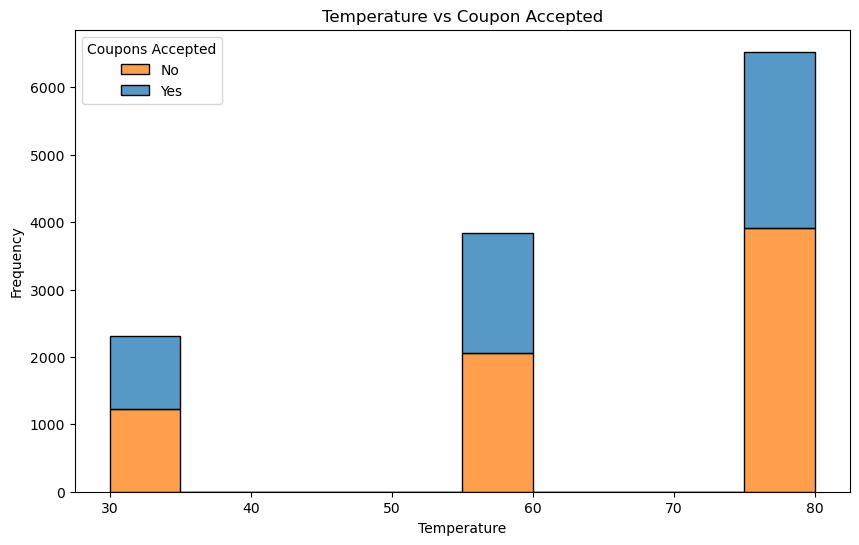

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='temperature', hue='Y', bins=10, multiple="stack")
plt.title('Temperature vs Coupon Accepted')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(title='Coupons Accepted', labels=['No', 'Yes'])
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [259]:
# DataFrame that contains just the bar coupons
barCoupon_data = data[data['coupon'] == 'Bar']
barCoupon_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [261]:
# proportion of bar coupons were accepted
barCoupons_total = barCoupon_data.shape[0]
barCoupons_accepted = barCoupon_data['Y'].sum()
proportion_accepted = barCoupons_accepted / barCoupons_total

print(f"proportion of bar coupons were accepted: {proportion_accepted:.2%}")

proportion of bar coupons were accepted: 41.00%


Y
0    1190
1     827
Name: count, dtype: int64


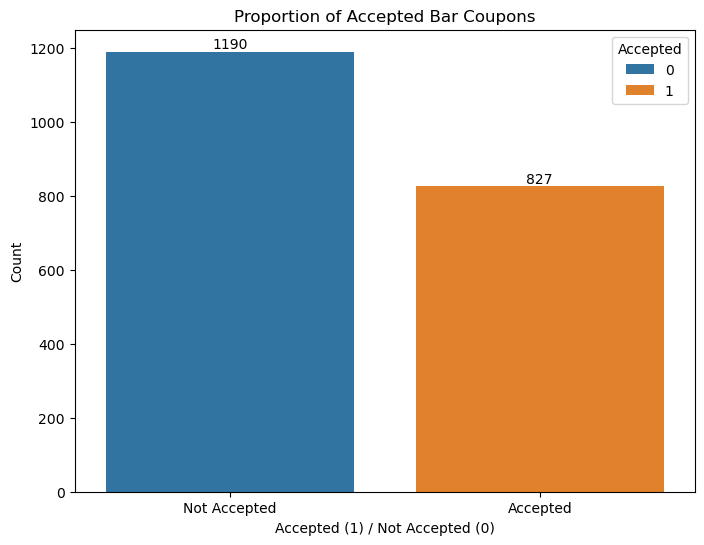

In [263]:
# Create a bar plot to visualize accepted coupons
barAccepted_counts = barCoupon_data['Y'].value_counts()
print(barAccepted_counts)
plt.figure(figsize=(8, 6))
sns.barplot(x=barAccepted_counts.index, y=barAccepted_counts.values, hue=barAccepted_counts.index )
plt.title('Proportion of Accepted Bar Coupons')
plt.xlabel('Accepted (1) / Not Accepted (0)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Accepted', 'Accepted'])
plt.legend(title='Accepted')

#To add count of accpeted coupons 
for x, y in zip(barAccepted_counts.index, barAccepted_counts.values):
    plt.text(x, y, f"{y:.0f}", ha='center', va='bottom')
    
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Coupons accepted rate for bar visits le3: 37.07%
Coupons accepted rate for bar visits gt3: 76.88%


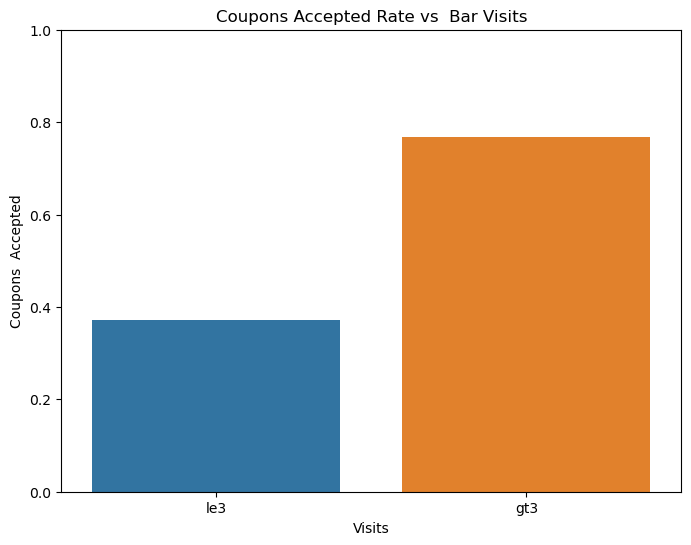

In [265]:

# Create separate dataframes for lte3 and gt3
# Here we are counting never and less1 , though it says never visited 
bar_le3 = barCoupon_data[barCoupon_data['Bar'].isin(['never', 'less1', '1~3'])]
bar_gt3 = barCoupon_data[barCoupon_data['Bar'].isin(['4~8', 'gt8'])]

# acceptance rate
accpt_le3 = bar_le3['Y'].mean()
accpt_gt3 = bar_gt3['Y'].mean()

print(f"Coupons accepted rate for bar visits le3: {accpt_le3:.2%}")
print(f"Coupons accepted rate for bar visits gt3: {accpt_gt3:.2%}")

# Create a bar plot to visualize the comparison
acceptance_rates = pd.DataFrame({
    'freq': ['le3', 'gt3'],
    'accpt_Rate': [accpt_le3, accpt_gt3]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='freq', y='accpt_Rate', hue='freq', data=acceptance_rates)
plt.title('Coupons Accepted Rate vs  Bar Visits')
plt.ylabel('Coupons  Accepted')
plt.xlabel('Visits')
plt.ylim(0, 1)
plt.show()




4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [267]:
# Create subsets based on the conditions
drivers_gt1_agt25 = barCoupon_data[(barCoupon_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (barCoupon_data['age'] > '25')]

total_accepted = drivers_gt1_agt25['Y'].sum()
total_drivers = len(drivers_gt1_agt25)
acceptance_rate = (total_accepted / total_drivers)

print(f"acceptance_rate for drivers visits gt1 and age gt 25: {acceptance_rate:.2%}")



drivers_others = barCoupon_data[((barCoupon_data['Bar'].isin(['never', 'less1'])) & (barCoupon_data['age'] < '25'))]

total_accepted_others = drivers_others['Y'].sum()
total_drivers_others = len(drivers_others)
acceptance_rate_others = (total_accepted_others / total_drivers_others) 

print(f"acceptance_rate for other drivers: {acceptance_rate_others:.2%}")

# Observation: Drivers age greater than 25 and who visits bar more then once accepts more coupons compare to others


acceptance_rate for drivers visits gt1 and age gt 25: 69.52%
acceptance_rate for other drivers: 39.33%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [269]:
# Create filtered datasets
drivers_bargt1_nkids = barCoupon_data[(barCoupon_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (barCoupon_data['passanger'] != 'Kid(s)') &(~barCoupon_data['occupation'].isin(['Farming Fishing & Forestry']))]

drivers_others = barCoupon_data[~((barCoupon_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
        (barCoupon_data['passanger'] != 'Kid(s)') &(~barCoupon_data['occupation'].isin(['Farming Fishing & Forestry'])))]

# Acceptance rates
acceptance_rate_drivers_bargt1 = drivers_bargt1_nkids['Y'].mean()
acceptance_rate_others = drivers_others['Y'].mean()

print(f"Acceptance rate for drivers bar visists gt1 and passengers no kids and had occupations other than farming, fishing, or forestry: {acceptance_rate_drivers_bargt1:.2%}")
print(f"Acceptance rate for other drivers: {acceptance_rate_others:.2%}")

Acceptance rate for drivers bar visists gt1 and passengers no kids and had occupations other than farming, fishing, or forestry: 71.32%
Acceptance rate for other drivers: 29.60%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



Acceptance rate: who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 71.32%
Acceptance rate: who go to bars more than once a month and are under the age of 30: 72.17%
Acceptance rate: who go to cheap restaurants more than 4 times a month and income is less than 50K: 45.61%


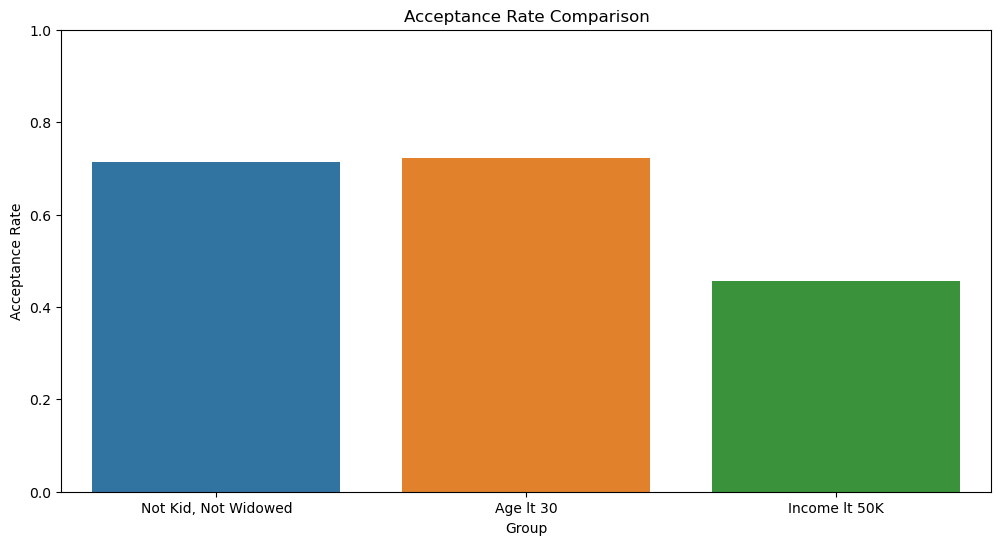

In [271]:
# filter data
pass_nkids_nwid = ((barCoupon_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (barCoupon_data['passanger'] != 'Kid(s)') & (barCoupon_data['maritalStatus'] != 'Widowed'))
age_lt30 = ((barCoupon_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (barCoupon_data['age'] < '30'))
rest_sal_lt50 = ((barCoupon_data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & (barCoupon_data['income'] < '$50000'))

# datasets for acceptance 
data_pass_nkids_nwid = barCoupon_data[pass_nkids_nwid]
data_age_lt30 = barCoupon_data[age_lt30]
data_rest_sal_lt50 = barCoupon_data[rest_sal_lt50]

# Accepted rates
accept_pass_nkids_nwid = data_pass_nkids_nwid['Y'].mean()
accept_age_lt30 = data_age_lt30['Y'].mean()
accept_rest_sal_lt50 = data_rest_sal_lt50['Y'].mean()

print(f"Acceptance rate: who go to bars more than once a month, had passengers that were not a kid, and were not widowed: {accept_pass_nkids_nwid:.2%}")
print(f"Acceptance rate: who go to bars more than once a month and are under the age of 30: {accept_age_lt30:.2%}")
print(f"Acceptance rate: who go to cheap restaurants more than 4 times a month and income is less than 50K: {acceptance_rate_subset_3:.2%}")

# bar plot to visualize 
acceptance_rates = pd.DataFrame({
    'Group': [
        'Not Kid, Not Widowed', 
        'Age lt 30', 
        'Income lt 50K'
    ],
    'Acceptance Rate': [
        accept_pass_nkids_nwid, 
        accept_age_lt30, 
        accept_rest_sal_lt50
    ]
})

plt.figure(figsize=(12, 6))
sns.barplot(x='Group', y='Acceptance Rate', hue='Group', data=acceptance_rates)
plt.title('Acceptance Rate Comparison')
plt.ylabel('Acceptance Rate')
plt.xlabel('Group')
plt.ylim(0, 1)
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?
   
Inference from all the above analysis for Bar coupon acceptance criteria 
1. Overall Bar acceptance rate is 41%
2. Drivers who visit bar more then three times a month accepts more coupons 77% when compare to others
3. Drivers who are older than 25 accepts more coupons 70%

Bar coupons will be good choice for drivers who visits bar more than 3 times and age older than 25 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  


# *Investigation Results*

Observations: 

1. proportion of bar coupons were accepted 41
2. pproportion of Coffee coupons were accepte:50
3. p
proportion of Restaurants <20 coupons were accepdd:1
4. p
proportion of Carry_takeaway coupons were accep d4
5. p%
proportion of Restaurants 20 50 coupons were acceted

Clearly we can see carry and takeaway coupons were accpeted tbe most and Bar category were the least 
Bar analysis was done above 

I have selected carry_takeaway for individual investigation
Observations:
1. If you look below the plots
    On a sunny day more number of coupons got accepted
    Widow and divorced people have accepted most number of couponsccepted: 44.10%.10%


proportion of bar coupons were accepted: 41.00%
proportion of Coffee coupons were accepted: 49.92%
proportion of Restaurants <20 coupons were accepted: 70.71%
proportion of Carry_takeaway coupons were accepted: 73.55%
proportion of Restaurants 20 50 coupons were accepted: 44.10%


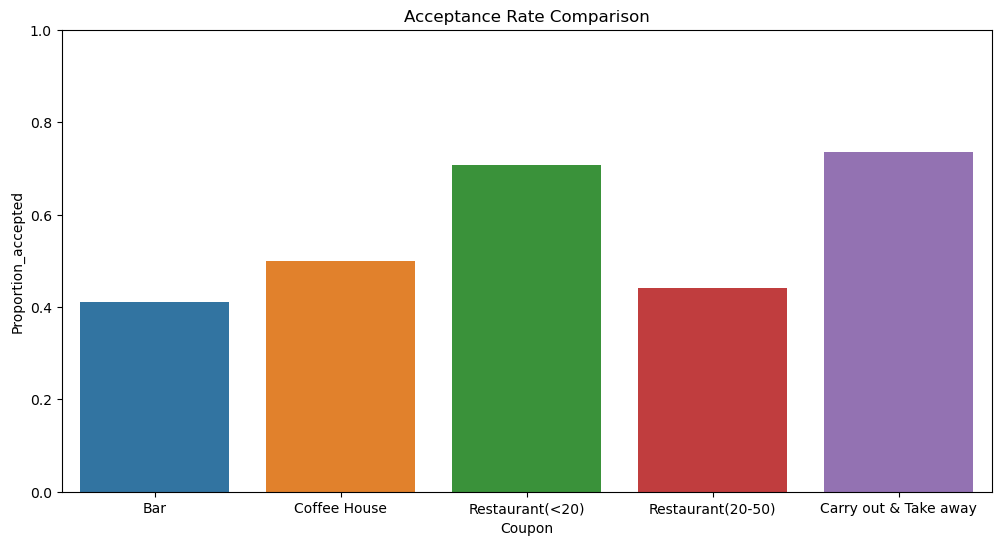

In [363]:
#Bar proportion from above
# proportion of bar coupons were accepted
barCoupons_total = barCoupon_data.shape[0]
barCoupons_accepted = barCoupon_data['Y'].sum()
proportion_accepted = barCoupons_accepted / barCoupons_total

print(f"proportion of bar coupons were accepted: {proportion_accepted:.2%}")

## proportion of Coffee coupons were accepted
coffeeCoupon_data = data[data['coupon'] == 'Coffee House']
CoffeeCoupons_total = coffeeCoupon_data.shape[0]
CoffeeCoupons_accepted = coffeeCoupon_data['Y'].sum()
CoffeeCoupon_proportion_accepted = CoffeeCoupons_accepted / CoffeeCoupons_total

print(f"proportion of Coffee coupons were accepted: {CoffeeCoupon_proportion_accepted:.2%}")

#Restaurant(<20) 
res_lt20_data = data[data['coupon'] == 'Restaurant(<20)']
res_lt20_total = res_lt20_data.shape[0]
res_lt20_accepted = res_lt20_data['Y'].sum()
res_lt20_proportion_accepted = res_lt20_accepted / res_lt20_total

print(f"proportion of Restaurants <20 coupons were accepted: {res_lt20_proportion_accepted:.2%}")
#Carry out & Take away
carry_take_data = data[data['coupon'] == 'Carry out & Take away']
carry_take_total = carry_take_data.shape[0]
carry_take_accepted = carry_take_data['Y'].sum()
carry_take_proportion_accepted = carry_take_accepted / carry_take_total

print(f"proportion of Carry_takeaway coupons were accepted: {carry_take_proportion_accepted:.2%}")
#Restaurant(20-50) 
res_20_50_data = data[data['coupon'] == 'Restaurant(20-50)']
res_20_50_total = res_20_50_data.shape[0]
res_20_50_accepted = res_20_50_data['Y'].sum()
res_20_50_proportion_accepted = res_20_50_accepted / res_20_50_total

print(f"proportion of Restaurants 20 50 coupons were accepted: {res_20_50_proportion_accepted:.2%}")


# Create a bar plot to visualize the comparison
prop_data = pd.DataFrame({
    'Coupon': [
        'Bar', 
        'Coffee House', 
        'Restaurant(<20)',
        'Restaurant(20-50)',
        'Carry out & Take away'
    ],
    'Proportion_accepted': [
        proportion_accepted,
        CoffeeCoupon_proportion_accepted, 
        res_lt20_proportion_accepted, 
        res_20_50_proportion_accepted,
        carry_take_proportion_accepted
    ]
})

plt.figure(figsize=(12, 6))
sns.barplot(x='Coupon', y='Proportion_accepted', hue='Coupon', data=prop_data)
plt.title('Acceptance Rate Comparison')
plt.ylabel('Proportion_accepted')
plt.xlabel('Coupon')
plt.ylim(0, 1)
plt.show()

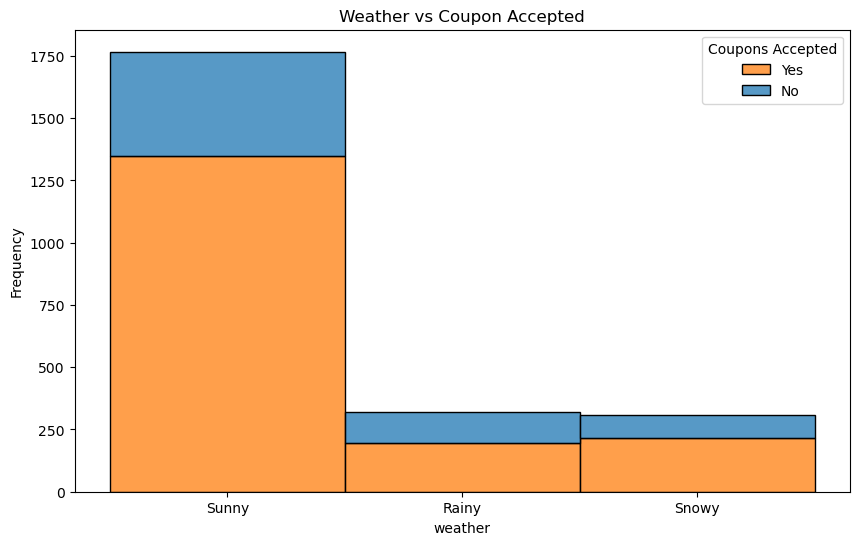

In [339]:
#Check if there is any relation with weather
#proportion of coupons accepted on each weather type
plt.figure(figsize=(10, 6))
sns.histplot(data=carry_take_data, x='weather', hue='Y', bins=10, multiple="stack")
plt.title('Weather vs Coupon Accepted')
plt.xlabel('weather')
plt.ylabel('Frequency')
plt.legend(title='Coupons Accepted', labels=['Yes', 'No'])
plt.show()

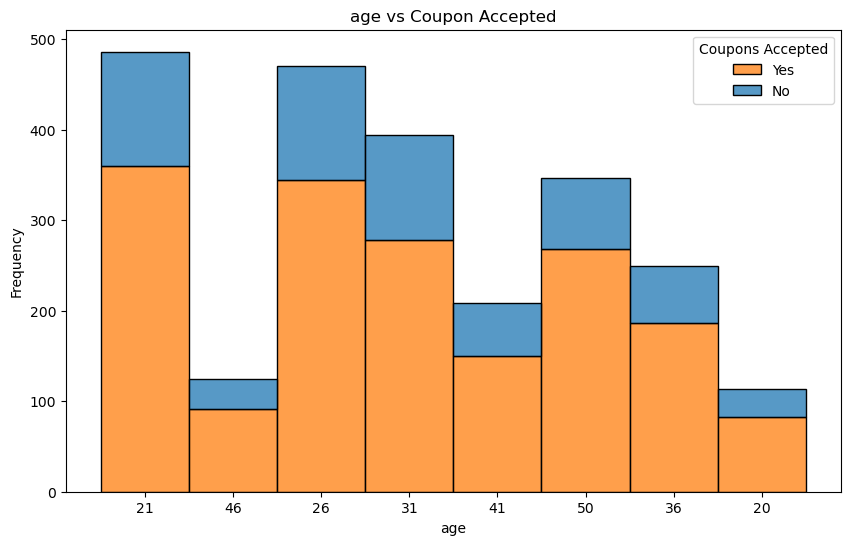

In [353]:
#Check if there is any relation with temperature
#proportion of coupons accepted on each temperature type
plt.figure(figsize=(10, 6))
sns.histplot(data=carry_take_data, x='age', hue='Y', bins=10, multiple="stack")
plt.title('age vs Coupon Accepted')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.legend(title='Coupons Accepted', labels=['Yes', 'No'])
plt.show()

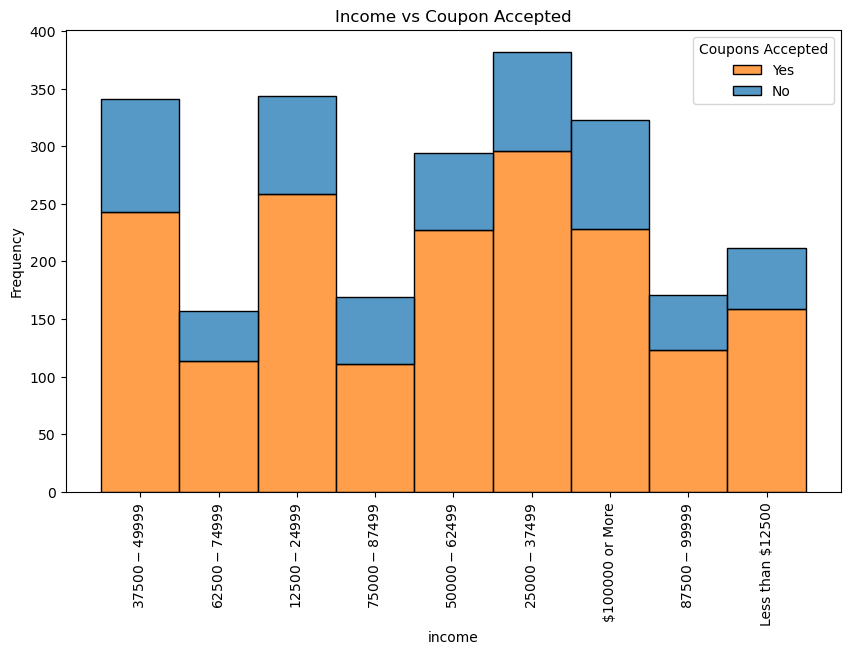

In [365]:
#Check if there is any relation with temperature
#proportion of coupons accepted on each temperature type
plt.figure(figsize=(10, 6))
sns.histplot(data=carry_take_data, x='income', hue='Y', bins=10, multiple="stack")
plt.title('Income vs Coupon Accepted')
plt.xlabel('income')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.legend(title='Coupons Accepted', labels=['Yes', 'No'])
plt.show()

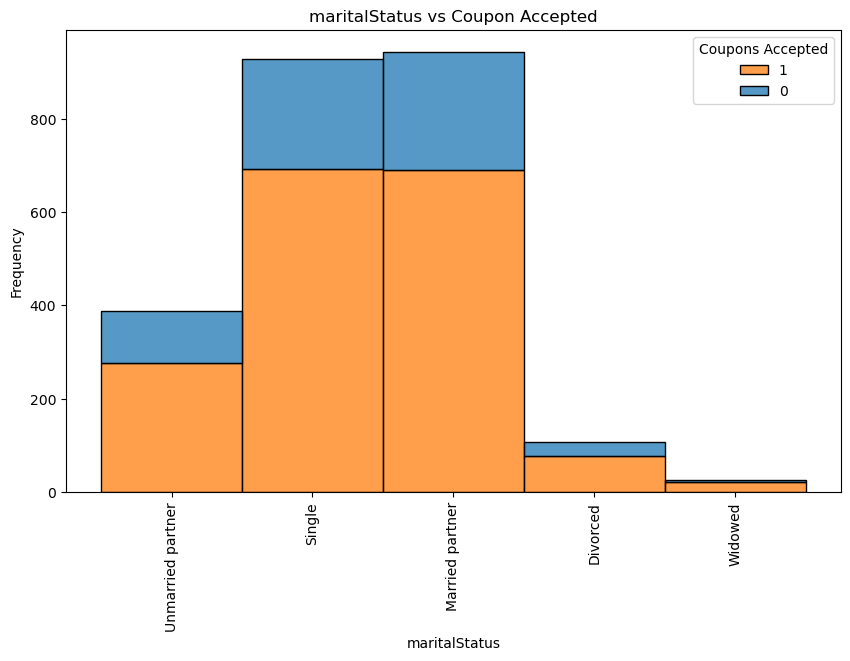

In [407]:
#maritalStatus
#Check if there is any relation with temperature
#proportion of coupons accepted on each temperature type
plt.figure(figsize=(10, 6))
sns.histplot(data=carry_take_data, x='maritalStatus', hue='Y', bins=10, multiple="stack")
plt.title('maritalStatus vs Coupon Accepted')
plt.xlabel('maritalStatus')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.legend(title='Coupons Accepted', labels=['1', '0'])
plt.show()

Coupons accepted rate for bar visits crry_tk_sm: 73.92%
Coupons accepted rate for bar visits crry_tk_others: 72.22%


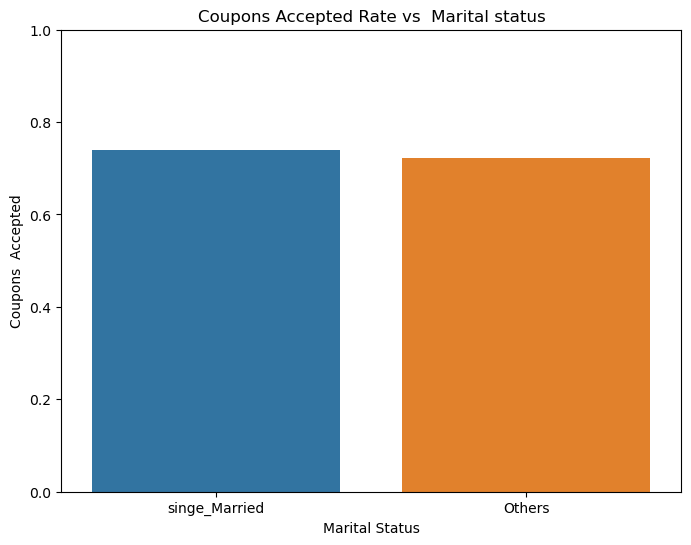

In [377]:
#proportion of drivers who are single, married vs others
# Create separate dataframes for lte3 and gt3
# Here we are counting never and less1 , though it says never visited 

carry_take_data = data[data['coupon'] == 'Carry out & Take away']
crry_tk_sm = carry_take_data[carry_take_data['maritalStatus'].isin(['Single', 'Married partner'])]
crry_tk_others = carry_take_data[carry_take_data['maritalStatus'].isin(['Unmarried partner', 'Divorced','Widowed'])]

# acceptance rate
accpt_crry_tk_sm = crry_tk_sm['Y'].mean()
accpt_crry_tk_others = crry_tk_others['Y'].mean()

print(f"Coupons accepted rate for bar visits crry_tk_sm: {accpt_crry_tk_sm:.2%}")
print(f"Coupons accepted rate for bar visits crry_tk_others: {accpt_crry_tk_others:.2%}")

# Create a bar plot to visualize the comparison
acceptance_rates = pd.DataFrame({
    'freq': ['singe_Married', 'Others'],
    'accpt_Rate': [accpt_crry_tk_sm, accpt_crry_tk_others]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='freq', y='accpt_Rate', hue='freq', data=acceptance_rates)
plt.title('Coupons Accepted Rate vs  Marital status')
plt.ylabel('Coupons  Accepted')
plt.xlabel('Marital Status')
plt.ylim(0, 1)
plt.show()
